In [1]:
%matplotlib inline
# %load ../../utility/initialization.py
'''
How to Train Your Dragon: V4
Sequentially initialize FT reactive distillation model automatically
'''
# system imports
import sys
import os
import datetime
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# import pickle
import dill
# from copy import deepcopy

# pyomo imports
from pyomo import environ as pe
from global_sets.component import m

from stages.reactive_stage import reactive_stage_rule
from stages.condenser_stage import condenser_stage_rule
from stages.reboiler_stage import reboiler_stage_rule

from utility.display_utility import beautify, beautify_reactive, HiddenLogs, HiddenPrints, plot_distribution
from utility.model_utility import add_dual, update_dual, delete_dual, check_DOF, check_iteration
from utility.model_utility import which_MPCC, select_MPCC, augmented_objective, add_solver
from utility.time_utility import create_filename_time, log_now, log_end

2018-07-24 14:52:22 - Start Program


In [2]:
logname = create_filename_time()
log_text_dir = './log/text/opt_'+logname+'.dat'
log_figure_dir = './log/figure/opt_'+logname+'.pdf'

In [3]:
with open('./log/model/stage_20_NCP.pickle','rb') as f:
    model = dill.load(f)

In [4]:
for j in model.reactive:
    model.reactive[j].MPCC_P_pf.rho = 10000
model.reboiler.MPCC_P_pf.rho = 10000

In [5]:
which_MPCC(model.reactive[1]).name

'reactive[1].MPCC_P_NCP'

In [6]:
opt = add_solver(pe, max_iter = 500, warm_start = True, output = True, scale = True)

In [7]:
results = opt.solve(model,tee=True)
update_dual(pe,model)

Ipopt 3.12.8: print_user_options=yes
linear_solver=ma86
linear_system_scaling=mc19
max_iter=500
warm_start_init_point=yes
warm_start_bound_push=1e-20
warm_start_mult_bound_push=1e-20
mu_init=1e-06
output_file=./tmp/ipopt_output_tmp.output
linear_scaling_on_demand=no


List of user-set options:

                                    Name   Value                used
                linear_scaling_on_demand = no                    yes
                           linear_solver = ma86                  yes
                   linear_system_scaling = mc19                  yes
                                max_iter = 500                   yes
                                 mu_init = 1e-06                 yes
                             output_file = ./tmp/ipopt_output_tmp.output  yes
                      print_user_options = yes                   yes
                   warm_start_bound_push = 1e-20                 yes
                   warm_start_init_point = yes                   yes
     

In [8]:
for j in model.reactive:
    select_MPCC(model.reactive[j],'pf')
select_MPCC(model.reboiler,'pf')

> Selected MPCC: reactive[1].MPCC_P_pf
s_L:  3.3613335972133935e-05
s_V:  4.335208484593434e-06

> Selected MPCC: reactive[2].MPCC_P_pf
s_L:  3.7025995146650244e-05
s_V:  4.259120671189302e-06

> Selected MPCC: reactive[3].MPCC_P_pf
s_L:  4.0738783004866635e-05
s_V:  4.30944943902403e-06

> Selected MPCC: reactive[4].MPCC_P_pf
s_L:  4.572277512129791e-05
s_V:  4.355651382280654e-06

> Selected MPCC: reactive[5].MPCC_P_pf
s_L:  5.642449338136979e-05
s_V:  4.407012457003987e-06

> Selected MPCC: reactive[6].MPCC_P_pf
s_L:  7.549951280332167e-05
s_V:  4.471516219573629e-06

> Selected MPCC: reactive[7].MPCC_P_pf
s_L:  0.000128297891893822
s_V:  4.562874196838597e-06

> Selected MPCC: reactive[8].MPCC_P_pf
s_L:  0.0003721554247917793
s_V:  4.6792524658637806e-06

> Selected MPCC: reactive[9].MPCC_P_pf
s_L:  0.0004792009308648472
s_V:  5.48120073367605e-06

> Selected MPCC: reactive[10].MPCC_P_pf
s_L:  0.0004873874665912211
s_V:  6.360616469006145e-06

> Selected MPCC: reactive[11].MPCC_P_p

In [9]:
model.del_component(model.obj)
model.obj = augmented_objective(pe,model,expr = sum(model.reactive[j].T for j in model.TRAY_reactive), sense = pe.maximize)

------------------------------------------------------------------------------------------------------------
> Obj = maximize
> reactive[8].T + reactive[9].T + reactive[10].T + reactive[11].T + reactive[12].T + reactive[14].T + reactive[15].T + reactive[16].T + reactive[17].T + reactive[18].T - reactive[1].MPCC_P_pf.pf - reactive[2].MPCC_P_pf.pf - reactive[3].MPCC_P_pf.pf - reactive[4].MPCC_P_pf.pf - reactive[5].MPCC_P_pf.pf - reactive[6].MPCC_P_pf.pf - reactive[7].MPCC_P_pf.pf - reactive[8].MPCC_P_pf.pf - reactive[9].MPCC_P_pf.pf - reactive[10].MPCC_P_pf.pf - reactive[11].MPCC_P_pf.pf - reactive[12].MPCC_P_pf.pf - reactive[13].MPCC_P_pf.pf - reactive[14].MPCC_P_pf.pf - reactive[15].MPCC_P_pf.pf - reactive[16].MPCC_P_pf.pf - reactive[17].MPCC_P_pf.pf - reactive[18].MPCC_P_pf.pf - reactive[19].MPCC_P_pf.pf - reactive[20].MPCC_P_pf.pf - reboiler.MPCC_P_pf.pf
------------------------------------------------------------------------------------------------------------


In [10]:
results = opt.solve(model,tee=True)
update_dual(pe,model)

Ipopt 3.12.8: print_user_options=yes
linear_solver=ma86
linear_system_scaling=mc19
max_iter=500
warm_start_init_point=yes
warm_start_bound_push=1e-20
warm_start_mult_bound_push=1e-20
mu_init=1e-06
output_file=./tmp/ipopt_output_tmp.output
linear_scaling_on_demand=no


List of user-set options:

                                    Name   Value                used
                linear_scaling_on_demand = no                    yes
                           linear_solver = ma86                  yes
                   linear_system_scaling = mc19                  yes
                                max_iter = 500                   yes
                                 mu_init = 1e-06                 yes
                             output_file = ./tmp/ipopt_output_tmp.output  yes
                      print_user_options = yes                   yes
                   warm_start_bound_push = 1e-20                 yes
                   warm_start_init_point = yes                   yes
     

In [11]:
pdf = PdfPages(log_figure_dir)


> Original 20 stage case
------------------------------------------------------------------------------------------------------------
Here comes the result:
Total Conversion: 81.20%
------------------------------------------------------------------------------------------------------------
stages       T      Q                                            V               L       P            W     
condenser    30.00  -134.                                        3.0267          0.6407  0.0337       2.0654

stages       T      Q           r_FT   Conv%  F      cat         V       Re      L       P            P_VLE 
NON--[1]     119.3  0.000       0.000  0.000  0.000  0.000       5.7667  0.0000  0.7437  0.0000       20.000
NON--[2]     131.1  0.000       0.000  0.000  0.000  0.000       5.8697  0.0000  0.6752  0.0000       20.000
NON--[3]     140.3  0.000       0.000  0.000  0.000  0.000       5.8012  0.0000  0.6136  0.0000       20.000
NON--[4]     148.7  0.000       0.000  0.000  0.000  

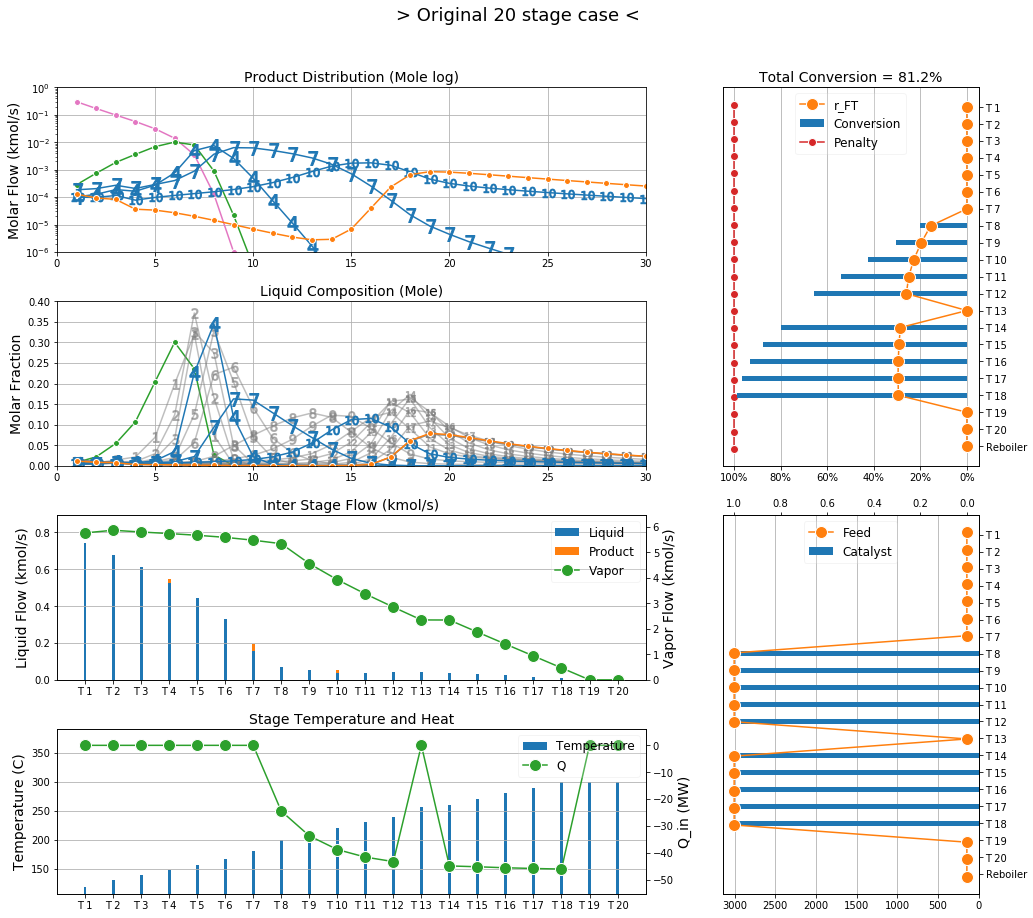

In [12]:
with HiddenLogs(log_text_dir,'w'):
    print('\n>','Original 20 stage case')
    print('-'*108)
    beautify(pe,model)
    log_now()

plot_distribution(model,pdf,'Original 20 stage case')

# Optimization Input

**Parameters:**
* Stage Temperature
    * Rectifying section: 200C - 300C
    * Stripping section: 200C - 300C
* Reflux
    * Distillate / (Distillate + Reflux): 0.5 - 0.05, Refulx Ratio: 1 - 19
* Side-draw ratio
    * PR_L: 0 - 1

**Constraints:**
* Product
    * Distillate: C5~C7 >= 0.75
    * Gasoline: C8~C12 >= 0.75
    * Diesel: C13~C18 >= 0.6
    * Heavy: C19+ >= 0.85
    
**Objective:**
* Max gasoline production

### Parameters

In [13]:
for j in model.TRAY_reactive:
    model.reactive[j].T.setlb(200+273.15)
    model.reactive[j].T.setub(300+273.15)
    
model.condenser.PR_L.unfix()
model.condenser.PR_L.setlb(0.05)
model.condenser.PR_L.setub(0.5)

In [14]:
model.reactive[4].PR_L.unfix()
model.reactive[7].PR_L.unfix()
model.reactive[10].PR_L.unfix()

### Constraints

In [15]:
model.quality_coefficient = pe.Param(within=pe.NonNegativeReals,mutable=True,initialize=1)

In [16]:
model.product_spec_con = pe.ConstraintList()

In [17]:
model.product_spec_con.add(expr = sum(model.condenser.x[i] for i in m.PRODUCT_cnumber['naphtha']) >= \
                           model.quality_coefficient*0.75*sum(model.condenser.x[i] for i in m.COMP_ORG));
model.product_spec_con.add(expr = sum(model.reactive[7].x[i] for i in m.PRODUCT_cnumber['gasoline']) >= \
                           model.quality_coefficient*0.75*sum(model.reactive[7].x[i] for i in m.COMP_ORG));
model.product_spec_con.add(expr = sum(model.reactive[10].x[i] for i in m.PRODUCT_cnumber['diesel']) >= \
                           model.quality_coefficient*0.6*sum(model.reactive[10].x[i] for i in m.COMP_ORG));
model.product_spec_con.add(expr = sum(model.reboiler.x[i] for i in m.PRODUCT_cnumber['heavy']) >= \
                           model.quality_coefficient*0.85*sum(model.reboiler.x[i] for i in m.COMP_ORG));

### Objective

In [18]:
model.del_component(model.obj)
model.obj = augmented_objective(pe,model,expr = model.reactive[7].L['P'], sense = pe.maximize)

------------------------------------------------------------------------------------------------------------
> Obj = maximize
> reactive[7].L[P] - reactive[1].MPCC_P_pf.pf - reactive[2].MPCC_P_pf.pf - reactive[3].MPCC_P_pf.pf - reactive[4].MPCC_P_pf.pf - reactive[5].MPCC_P_pf.pf - reactive[6].MPCC_P_pf.pf - reactive[7].MPCC_P_pf.pf - reactive[8].MPCC_P_pf.pf - reactive[9].MPCC_P_pf.pf - reactive[10].MPCC_P_pf.pf - reactive[11].MPCC_P_pf.pf - reactive[12].MPCC_P_pf.pf - reactive[13].MPCC_P_pf.pf - reactive[14].MPCC_P_pf.pf - reactive[15].MPCC_P_pf.pf - reactive[16].MPCC_P_pf.pf - reactive[17].MPCC_P_pf.pf - reactive[18].MPCC_P_pf.pf - reactive[19].MPCC_P_pf.pf - reactive[20].MPCC_P_pf.pf - reboiler.MPCC_P_pf.pf
------------------------------------------------------------------------------------------------------------


In [19]:
results = opt.solve(model,tee=True)
update_dual(pe,model)

Ipopt 3.12.8: print_user_options=yes
linear_solver=ma86
linear_system_scaling=mc19
max_iter=500
warm_start_init_point=yes
warm_start_bound_push=1e-20
warm_start_mult_bound_push=1e-20
mu_init=1e-06
output_file=./tmp/ipopt_output_tmp.output
linear_scaling_on_demand=no


List of user-set options:

                                    Name   Value                used
                linear_scaling_on_demand = no                    yes
                           linear_solver = ma86                  yes
                   linear_system_scaling = mc19                  yes
                                max_iter = 500                   yes
                                 mu_init = 1e-06                 yes
                             output_file = ./tmp/ipopt_output_tmp.output  yes
                      print_user_options = yes                   yes
                   warm_start_bound_push = 1e-20                 yes
                   warm_start_init_point = yes                   yes
     

In [20]:
with HiddenLogs(log_text_dir):
    print('\n>','Optimized Product Side Draw')
    print('-'*108)
    beautify(pe,model)
    # check_product_spec(model)
    log_now()

plot_distribution(model,pdf,'Optimized Product Side Draw')


> Optimized Product Side Draw
------------------------------------------------------------------------------------------------------------
Here comes the result:
Total Conversion: 87.88%
------------------------------------------------------------------------------------------------------------
stages       T      Q                                            V               L       P            W     
condenser    30.00  -162.                                        2.1132          0.9770  0.0913       2.3384

stages       T      Q           r_FT   Conv%  F      cat         V       Re      L       P            P_VLE 
NON--[1]     132.4  0.000       0.000  0.000  0.000  0.000       5.5201  0.0000  1.2093  0.0000       20.000
NON--[2]     147.6  0.000       0.000  0.000  0.000  0.000       5.7524  0.0000  1.1552  0.0000       20.000
NON--[3]     158.2  0.000       0.000  0.000  0.000  0.000       5.6983  0.0000  1.1103  0.0000       20.000
NON--[4]     166.7  0.000       0.000  0.000  0.

NameError: name 'check_product_spec' is not defined

# Open up feed allocation

**Parameters:**
* Stage Temperature
    * Rectifying section: 200C - 300C
    * Stripping section: 200C - 300C
* Reflux
    * Distillate / (Distillate + Reflux): 0.5 - 0.05, Refulx Ratio: 1 - 19
* Side-draw
    * PR_L: 0 - 1
    
* Feed
    * F: 0 - 3

**Constraints:**
* Product
    * Distillate: C5~C7 >= 0.75
    * Gasoline: C8~C12 >= 0.75
    * Diesel: C13~C18 >= 0.6
    * Heavy: C19+ >= 0.85
    
* Total feed
    * Total feed = 10 kmol/s
    
**Objective:**
* Max gasoline production

In [21]:
for j in model.reactive:
    model.reactive[j].F.unfix()
    model.reactive[j].F.setlb(0)
    model.reactive[j].F.setub(10)

In [22]:
model.total_feed_con = pe.ConstraintList()

In [23]:
model.total_feed_con.add(expr = sum(model.reactive[j].F for j in model.reactive) == 10);

In [24]:
results = opt.solve(model,tee=True)
update_dual(pe,model)

Ipopt 3.12.8: print_user_options=yes
linear_solver=ma86
linear_system_scaling=mc19
max_iter=500
warm_start_init_point=yes
warm_start_bound_push=1e-20
warm_start_mult_bound_push=1e-20
mu_init=1e-06
output_file=./tmp/ipopt_output_tmp.output
linear_scaling_on_demand=no


List of user-set options:

                                    Name   Value                used
                linear_scaling_on_demand = no                    yes
                           linear_solver = ma86                  yes
                   linear_system_scaling = mc19                  yes
                                max_iter = 500                   yes
                                 mu_init = 1e-06                 yes
                             output_file = ./tmp/ipopt_output_tmp.output  yes
                      print_user_options = yes                   yes
                   warm_start_bound_push = 1e-20                 yes
                   warm_start_init_point = yes                   yes
     

  66 -1.2401721e-01 2.43e-05 2.28e-05  -6.0 1.12e+00    -  1.00e+00 1.00e+00h  1
  67 -1.2401721e-01 2.83e-10 1.46e-10  -6.0 2.73e-03    -  1.00e+00 1.00e+00h  1
  68 -1.2438985e-01 3.80e+01 1.00e+02  -9.0 5.85e+03    -  6.64e-02 2.77e-01f  1
  69 -1.2452524e-01 4.40e+01 1.11e+02  -9.0 6.65e+03    -  4.62e-02 1.25e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 -1.2459095e-01 4.52e+01 8.59e+01  -9.0 8.29e+03    -  3.13e-01 5.72e-02h  1
  71 -1.2465305e-01 4.38e+01 6.51e+01  -9.0 4.27e+03    -  3.82e-01 1.01e-01h  1
  72 -1.2472825e-01 3.64e+01 7.70e+01  -9.0 1.78e+03    -  3.90e-01 2.45e-01h  1
  73 -1.2478266e-01 3.10e+01 2.31e+02  -9.0 1.75e+03    -  5.75e-01 2.26e-01h  1
  74 -1.2480125e-01 2.87e+01 2.85e+02  -9.0 1.73e+03    -  7.45e-02 8.58e-02h  1
  75 -1.2480549e-01 1.93e+01 1.64e+02  -9.0 9.73e+01    -  5.19e-02 3.26e-01h  1
  76 -1.2479370e-01 8.11e-01 2.37e+01  -9.0 4.00e+01    -  3.16e-01 9.58e-01h  1
  77 -1.2479304e-01 4.43e-01


> Optimized Feed Amount and Location
------------------------------------------------------------------------------------------------------------
Here comes the result:
Total Conversion: 89.62%
------------------------------------------------------------------------------------------------------------
stages       T      Q                                            V               L       P            W     
condenser    30.00  -149.                                        1.8208          0.6124  0.0967       2.4284

stages       T      Q           r_FT   Conv%  F      cat         V       Re      L       P            P_VLE 
NON--[1]     124.4  0.000       0.000  0.000  0.000  0.000       4.9584  0.0000  0.7200  0.0000       20.000
NON--[2]     133.4  0.000       0.000  0.000  0.000  0.000       5.0660  0.0000  0.6684  0.0000       20.000
NON--[3]     140.6  0.000       0.000  0.000  0.000  0.000       5.0144  0.0000  0.6306  0.0000       20.000
NON--[4]     147.1  0.000       0.000  0.

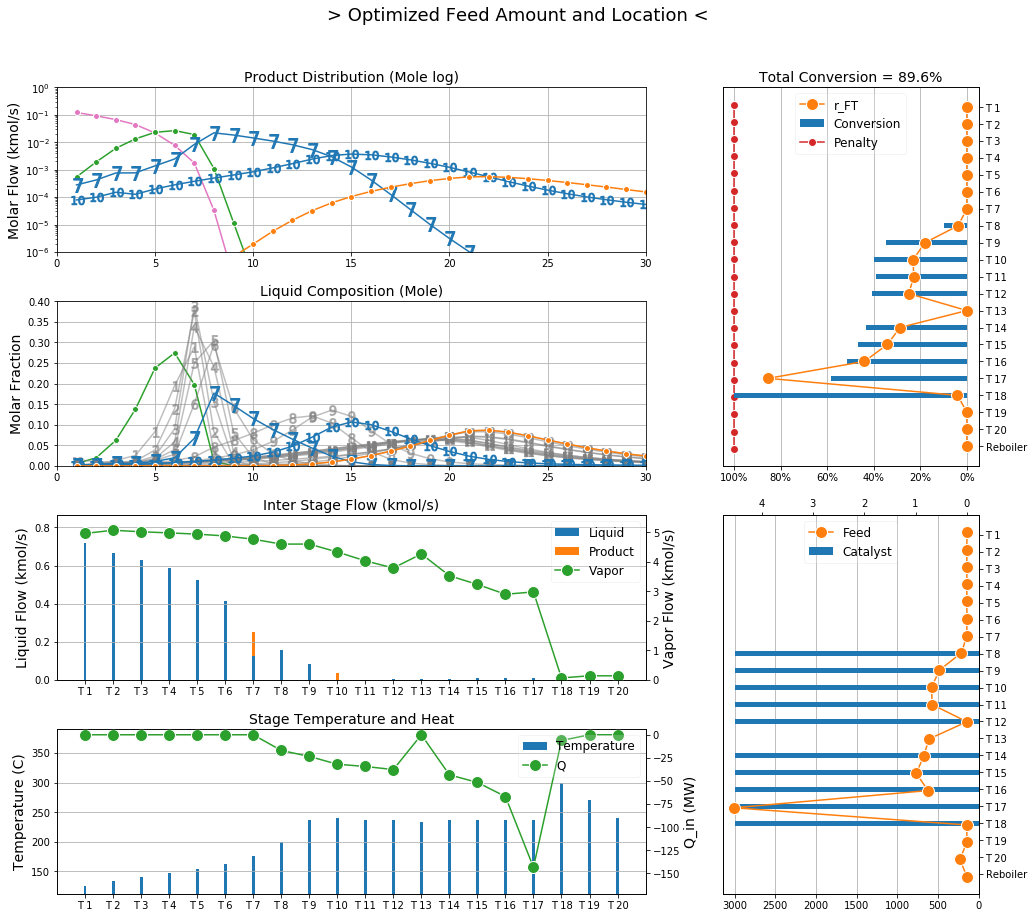

In [25]:
with HiddenLogs(log_text_dir):
    print('\n>','Optimized Feed Amount and Location')
    print('-'*108)
    beautify(pe,model)
    # check_product_spec(model)
    log_now()

plot_distribution(model,pdf,'Optimized Feed Amount and Location')

# Increase spec a little bit

**Parameters:**
* Stage Temperature
    * Rectifying section: 200C - 300C
    * Stripping section: 200C - 300C
* Reflux
    * Distillate / (Distillate + Reflux): 0.5 - 0.05, Refulx Ratio: 1 - 19
* Side-draw
    * PR_L: 0 - 1
    
* Feed
    * F: 0 - 3

**Constraints:**
* Product
    * Distillate: C5~C7 >= 0.75
    * Gasoline: C8~C12 >= **0.8**
    * Diesel: C13~C18 >= 0.6
    * Heavy: C19+ >= 0.85
    
* Total feed
    * Total feed = 10 kmol/s
    
**Objective:**
* Max gasoline production

In [ ]:
# model.product_spec_con.add(expr = sum(model.reactive[7].x[i] for i in product['gasoline']) >= \
#                            model.quality_coefficient*0.8*sum(model.reactive[7].x[i] for i in m.COMP_ORG));

In [ ]:
# results = opt.solve(model,tee=True)
# update_dual(pe,model)

In [ ]:
# with HiddenLogs(log_text_dir):
#     print('\n>','Increase Gasoline Specification to 80%')
#     print('-'*108)
#     beautify(pe,model)
#     check_product_spec(model)
#     log_now()

# plot_distribution(model,pdf,'Increase Gasoline Specification to 80%')

# Open up catalyst allocation ( = TOTAL reconstruction, long wait time)

**Parameters:**
* Stage Temperature
    * Rectifying section: 200C - 300C
    * Stripping section: 200C - 300C
* Reflux
    * Distillate / (Distillate + Reflux): 0.5 - 0.05, Refulx Ratio: 1 - 19
* Side-draw
    * PR_L: 0 - 1
    
* Feed
    * F: 0 - 3
        
* Catalyst
    * cat: 0 - 10000

**Constraints:**
* Product
    * Distillate: C5~C7 >= 0.75
    * Gasoline: C8~C12 >= 0.75 / 0.8
    * Diesel: C13~C18 >= 0.6
    * Heavy: C19+ >= 0.85
    
* Total feed
    * sum feed = 10 kmol/s
    
* Total catalyst
    * sum cat = 30000 kg
    
**Objective:**
* Max gasoline production

In [ ]:
# for j in model.reactive:
#     model.reactive[j].cat.unfix()
#     model.reactive[j].cat.setlb(0)
#     model.reactive[j].cat.setub(30000)

In [ ]:
# model.total_cat_con = pe.ConstraintList()

In [ ]:
# model.total_cat_con.add(expr = sum(model.reactive[j].cat for j in model.reactive) == 10*3000);

In [ ]:
# results = opt.solve(model,tee=True)
# update_dual(pe,model)

In [ ]:
# with HiddenLogs(log_text_dir):
#     print('\n>','Optimized Catalyst Amount and Location')
#     print('-'*108)
#     beautify(pe,model)
#     check_product_spec(model)
#     log_now()

# plot_distribution(model,pdf,'Optimized Catalyst Amount and Location')

In [26]:
pdf.close()

In [ ]:
# with open('./log/model/{}.pickle'.format(logname),'wb') as f:
#     dill.dump(model,f)

In [ ]:
# for j in model.TRAY_reactive:
#     print('stage',j,'\n')
#     print('Total Flow\t{}'.format(model.reactive[j].F.value + sum(model.reactive[j].r_total_comp[i].value for i in m.COMP_TOTAL)))
#     for i in m.COMP_TOTAL:
#         if i in m.COMP_FEED:
#             print('{}\t\t{}'.format(i,model.reactive[j].F.value*model.reactive[j].z[i].value + model.reactive[j].r_total_comp[i].value))
#         else:
#             print('{}\t\t{}'.format(i,model.reactive[j].r_total_comp[i].value))